# Part 1. Getting Started- Load Packages

In [ ]:
!pip install git+https://github.com/AI4Finance-LLC/FinRL-Library.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/AI4Finance-LLC/FinRL-Library.git to /tmp/pip-req-build-c24rx8ox
  Running command git clone -q https://github.com/AI4Finance-LLC/FinRL-Library.git /tmp/pip-req-build-c24rx8ox
  Cloning https://github.com/quantopian/pyfolio.git to /tmp/pip-install-9wyyxxis/pyfolio_ae6b8d35bd044a39a68147e53815ba6a
  Running command git clone -q https://github.com/quantopian/pyfolio.git /tmp/pip-install-9wyyxxis/pyfolio_ae6b8d35bd044a39a68147e53815ba6a
  Cloning https://github.com/AI4Finance-Foundation/ElegantRL.git to /tmp/pip-install-9wyyxxis/elegantrl_a1cd6e31fba54a0d9a1036476a284611
  Running command git clone -q https://github.com/AI4Finance-Foundation/ElegantRL.git /tmp/pip-install-9wyyxxis/elegantrl_a1cd6e31fba54a0d9a1036476a284611
     |████████████████████████████████| 2.3 MB 11.8 MB/s 
     |████████████████████████████████| 234 kB 45.6 MB/s 
     |█████████████████████

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# matplotlib.use('Agg')
import datetime

%matplotlib inline
from finrl import config
from finrl import config_tickers
from finrl.config import INDICATORS
from finrl.meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.meta.preprocessor.preprocessors import FeatureEngineer, data_split
#from finrl.meta.env_stock_trading.env_stocktrading import StockTradingEnv
#from finrl.agents.stablebaselines3.models import DRLAgent,DRLEnsembleAgent
from finrl.plot import backtest_stats, backtest_plot, get_daily_return, get_baseline

from pprint import pprint

import sys
sys.path.append("../FinRL-Library")

import itertools

In [ ]:
from env_reverse import StockTradingEnv

In [ ]:
from model_with_reverse_env_ppo_a2c import DRLAgent,DRLEnsembleAgent

In [ ]:
import os
if not os.path.exists("./" + config.DATA_SAVE_DIR):
    os.makedirs("./" + config.DATA_SAVE_DIR)
if not os.path.exists("./" + config.TRAINED_MODEL_DIR):
    os.makedirs("./" + config.TRAINED_MODEL_DIR)
if not os.path.exists("./" + config.TENSORBOARD_LOG_DIR):
    os.makedirs("./" + config.TENSORBOARD_LOG_DIR)
if not os.path.exists("./" + config.RESULTS_DIR):
    os.makedirs("./" + config.RESULTS_DIR)

In [ ]:
print(config_tickers.DOW_30_TICKER)

['AXP', 'AMGN', 'AAPL', 'BA', 'CAT', 'CSCO', 'CVX', 'GS', 'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'KO', 'JPM', 'MCD', 'MMM', 'MRK', 'MSFT', 'NKE', 'PG', 'TRV', 'UNH', 'CRM', 'VZ', 'V', 'WBA', 'WMT', 'DIS', 'DOW']


# Part 2. Download Data

In [ ]:
df = YahooDownloader(start_date = '2009-04-01',
                     end_date = '2022-06-01',
                     ticker_list = config_tickers.DOW_30_TICKER).fetch_data()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [ ]:
df.head()

,date,open,high,low,close,volume,tic,day
0,2009-04-01,3.717500,3.892857,3.710357,3.308904,589372000.0,AAPL,2
1,2009-04-01,48.779999,48.930000,47.099998,36.477917,10850100.0,AMGN,2
2,2009-04-01,13.340000,14.640000,13.080000,11.772774,27701800.0,AXP,2
3,2009-04-01,34.520000,35.599998,34.209999,26.850746,9288800.0,BA,2
4,2009-04-01,27.500000,29.520000,27.440001,19.820395,15308300.0,CAT,2


In [ ]:
df.sort_values(['date','tic']).head()

,date,open,high,low,close,volume,tic,day
0,2009-04-01,3.717500,3.892857,3.710357,3.308904,589372000.0,AAPL,2
1,2009-04-01,48.779999,48.930000,47.099998,36.477917,10850100.0,AMGN,2
2,2009-04-01,13.340000,14.640000,13.080000,11.772774,27701800.0,AXP,2
3,2009-04-01,34.520000,35.599998,34.209999,26.850746,9288800.0,BA,2
4,2009-04-01,27.500000,29.520000,27.440001,19.820395,15308300.0,CAT,2


In [ ]:
len(df.tic.unique())

30

# Part 3: Preprocess Data

In [ ]:
df.tic.value_counts()

AAPL    3315
AMGN    3315
WMT     3315
WBA     3315
VZ      3315
V       3315
UNH     3315
TRV     3315
PG      3315
NKE     3315
MSFT    3315
MRK     3315
MMM     3315
MCD     3315
KO      3315
JPM     3315
JNJ     3315
INTC    3315
IBM     3315
HON     3315
HD      3315
GS      3315
DIS     3315
CVX     3315
CSCO    3315
CRM     3315
CAT     3315
BA      3315
AXP     3315
DOW      807
Name: tic, dtype: int64

In [ ]:
fe = FeatureEngineer(
                    use_technical_indicator=True,
                    tech_indicator_list = INDICATORS,
                    use_turbulence=True,
                    user_defined_feature = False)

processed = fe.preprocess_data(df)
processed = processed.copy()
processed = processed.fillna(0)
processed = processed.replace(np.inf,0)

Successfully added technical indicators
Successfully added turbulence index


# Part 4. Design Environment

In [ ]:
stock_dimension = len(processed.tic.unique())
state_space = 1 + 2*stock_dimension + len(INDICATORS)*stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")

Stock Dimension: 29, State Space: 291


In [ ]:
env_kwargs = {
    "hmax": 100, 
    "initial_amount": 1000000, 
    "buy_cost_pct": 0.001, 
    "sell_cost_pct": 0.001, 
    "state_space": state_space, 
    "stock_dim": stock_dimension, 
    "tech_indicator_list": INDICATORS,
    "action_space": stock_dimension, 
    "reward_scaling": 1e-4,
    "print_verbosity":5
    
}

# Part 5: Run the Model

In [ ]:
rebalance_window = 63 # rebalance_window is the number of days to retrain the model
validation_window = 63 # validation_window is the number of days to do validation and trading (e.g. if validation_window=63, then both validation and trading period will be 63 days)
train_start = '2009-04-01'
train_end = '2021-04-01'
val_test_start = '2021-04-01'
val_test_end = '2022-06-01'

ensemble_agent = DRLEnsembleAgent(df=processed,
                 train_period=(train_start,train_end),
                 val_test_period=(val_test_start,val_test_end),
                 rebalance_window=rebalance_window, 
                 validation_window=validation_window, 
                 **env_kwargs)

In [ ]:
A2C_model_kwargs = {
                    'n_steps': 5,
                    'ent_coef': 0.01,
                    'learning_rate': 0.0005
                    }

PPO_model_kwargs = {
                    "ent_coef":0.01,
                    "n_steps": 2048,
                    "learning_rate": 0.00025,
                    "batch_size": 64
                    }

DDPG_model_kwargs = {
                      #"action_noise":"ornstein_uhlenbeck",
                      "buffer_size": 10_000,
                      "learning_rate": 0.0005,
                      "batch_size": 64
                    }

timesteps_dict = {'a2c' : 10_000, 
                 'ppo' : 10_000, 
                 'ddpg' : 10_000
                 }

In [ ]:
df_summary = ensemble_agent.run_ensemble_strategy(A2C_model_kwargs,
                                                 PPO_model_kwargs,
                                                 DDPG_model_kwargs,
                                                 timesteps_dict)

============Start Ensemble Strategy============
turbulence_threshold:  201.71788059862087
======Model training from:  2009-04-01 to  2021-04-05
======A2C Training========
{'n_steps': 5, 'ent_coef': 0.01, 'learning_rate': 0.0005}
Using cpu device
Logging to tensorboard_log/a2c/a2c_126_1
-------------------------------------
| time/                 |           |
|    fps                | 47        |
|    iterations         | 100       |
|    time_elapsed       | 10        |
|    total_timesteps    | 500       |
| train/                |           |
|    entropy_loss       | -41.2     |
|    explained_variance | 0.000383  |
|    learning_rate      | 0.0005    |
|    n_updates          | 99        |
|    policy_loss        | 694       |
|    reward             | 2.4489398 |
|    std                | 1         |
|    value_loss         | 4.82e+03  |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 50 

In [ ]:
df_summary

,Iter,Val Start,Val End,Model Used,A2C Sharpe,PPO Sharpe,A2C REVERSE Sharpe,PPO REVERSE Sharpe
0,126,2021-04-05,2021-07-02,A2C,0.111219,-0.028778,-0.101242,-0.08333
1,189,2021-07-02,2021-10-01,A2C,0.201059,-0.401247,0.028195,-0.164041
2,252,2021-10-01,2021-12-31,PPO,0.06261,0.243977,0.030901,0.008697


# Part 6: Backtest Our Strategy

In [ ]:
unique_trade_date = processed[(processed.date > val_test_start)&(processed.date <= val_test_end)].date.unique()

In [ ]:
df_trade_date = pd.DataFrame({'datadate':unique_trade_date})

df_account_value=pd.DataFrame()
for i in range(rebalance_window+validation_window, len(unique_trade_date)+1,rebalance_window):
    temp = pd.read_csv('results/account_value_trade_{}_{}.csv'.format('ensemble',i))


    df_account_value = df_account_value.append(temp,ignore_index=True)
sharpe=(252**0.5)*df_account_value.account_value.pct_change(1).mean()/df_account_value.account_value.pct_change(1).std()
print('Sharpe Ratio: ',sharpe)
df_account_value=df_account_value.join(df_trade_date[validation_window:].reset_index(drop=True))

Sharpe Ratio:  0.5097609515934168


In [ ]:
print(df_account_value)


     account_value        date  daily_return    datadate
0     1.000000e+06  2021-07-02           NaN  2021-07-02
1     9.978774e+05  2021-07-06     -0.002123  2021-07-06
2     1.003394e+06  2021-07-07      0.005529  2021-07-07
3     1.002520e+06  2021-07-08     -0.000872  2021-07-08
4     1.016658e+06  2021-07-09      0.014103  2021-07-09
..             ...         ...           ...         ...
184   1.056342e+06  2022-03-25      0.005090  2022-03-25
185   1.067754e+06  2022-03-28      0.010803  2022-03-28
186   1.075683e+06  2022-03-29      0.007426  2022-03-29
187   1.080077e+06  2022-03-30      0.004085  2022-03-30
188   1.063889e+06  2022-03-31     -0.014987  2022-03-31

[189 rows x 4 columns]


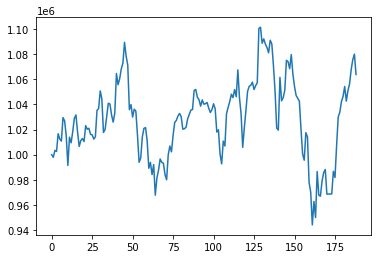

In [ ]:
%matplotlib inline
df_account_value.account_value.plot()

# 6.1 BackTestStats

In [ ]:
print("==============Get Backtest Results===========")
now = datetime.datetime.now().strftime('%Y%m%d-%Hh%M')

perf_stats_all = backtest_stats(account_value=df_account_value)
perf_stats_all = pd.DataFrame(perf_stats_all)

==============Get Backtest Results===========
Annual return          0.086080
Cumulative returns     0.063889
Annual volatility      0.203040
Sharpe ratio           0.509761
Calmar ratio           0.601953
Stability              0.006887
Max drawdown          -0.143002
Omega ratio            1.091494
Sortino ratio          0.748627
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.013107
Daily value at risk   -0.025170
dtype: float64


In [ ]:
#baseline stats
print("==============Get Baseline Stats===========")
baseline_df = get_baseline(
        ticker="^DJI", 
        start = df_account_value.loc[0,'date'],
        end = df_account_value.loc[len(df_account_value)-1,'date'])

stats = backtest_stats(baseline_df, value_col_name = 'close')

==============Get Baseline Stats===========
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (188, 8)
Annual return          0.017086
Cumulative returns     0.012719
Annual volatility      0.141552
Sharpe ratio           0.190775
Calmar ratio           0.150890
Stability              0.027233
Max drawdown          -0.113235
Omega ratio            1.031736
Sortino ratio          0.268611
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.032551
Daily value at risk   -0.017727
dtype: float64


# 6.2 BackTestPlot

==============Compare to DJIA===========
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (188, 8)


Start date,2021-07-02
End date,2022-03-31
Total months,9
,Backtest
Annual return,8.608%
Cumulative returns,6.389%
Annual volatility,20.304%
Sharpe ratio,0.51
Calmar ratio,0.60
Stability,0.01
Max drawdown,-14.3%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,14.30,2022-01-05,2022-02-22,NaT,NaN
1,11.18,2021-09-07,2021-10-04,2022-01-04,86
2,3.71,2021-07-14,2021-07-19,2021-07-26,9
3,3.15,2021-08-16,2021-08-18,2021-08-30,11
4,2.44,2021-07-26,2021-07-28,2021-08-12,14


Stress Events,mean,min,max
New Normal,0.04%,-3.58%,4.12%


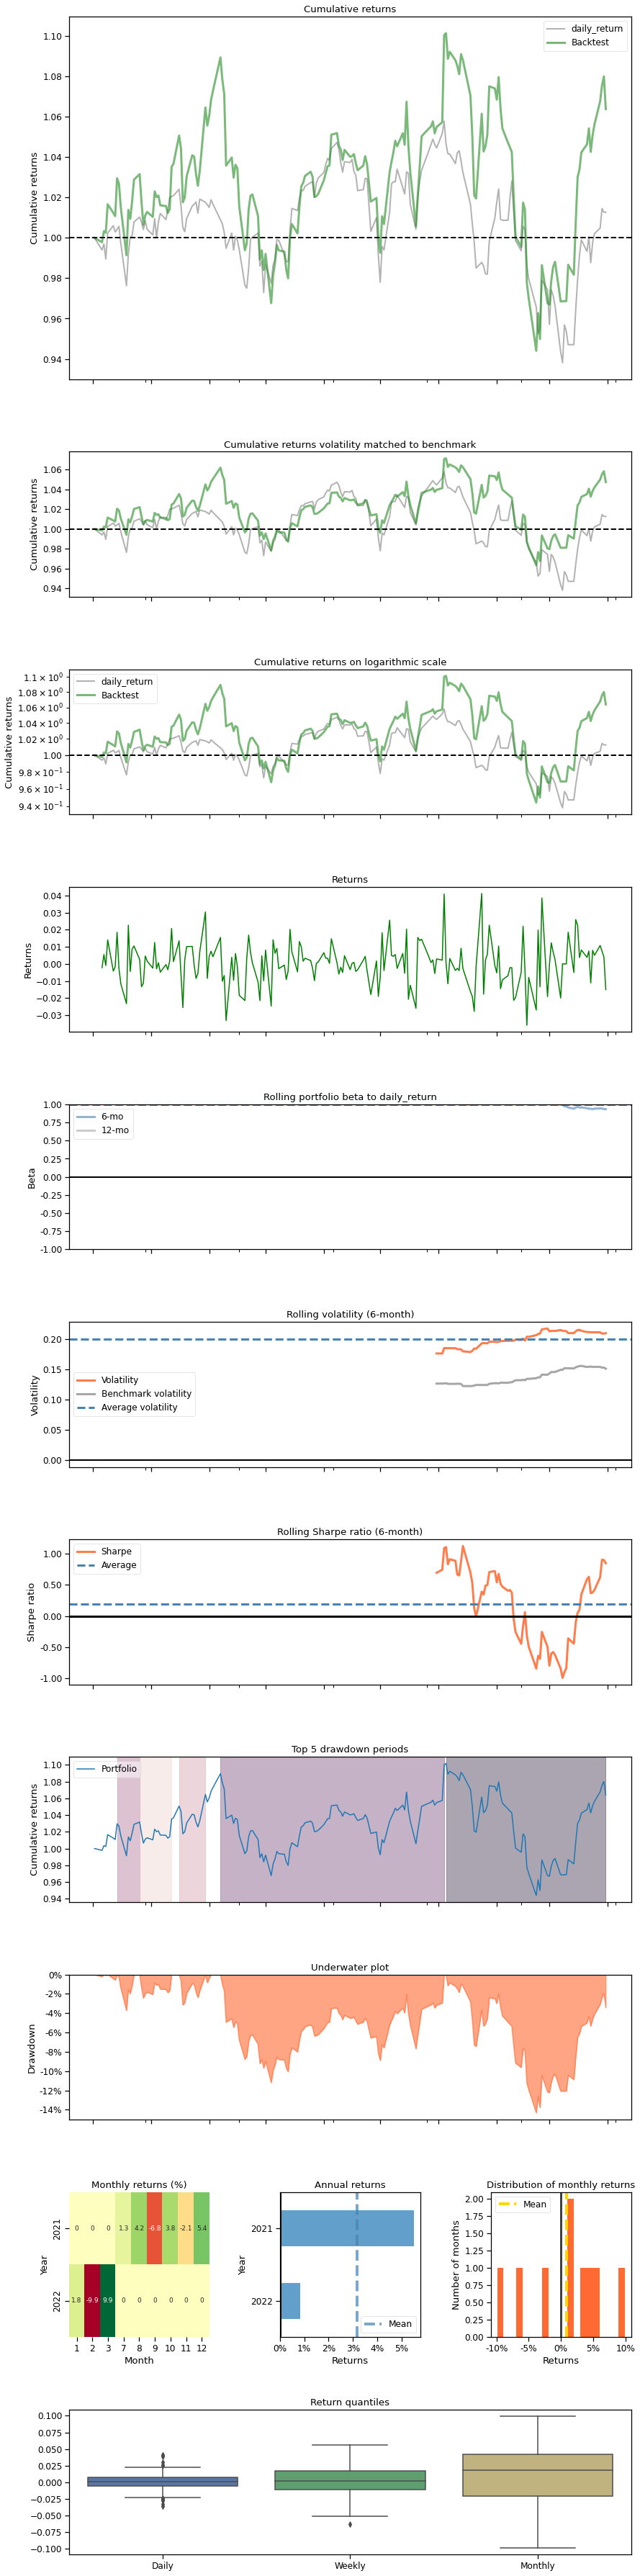

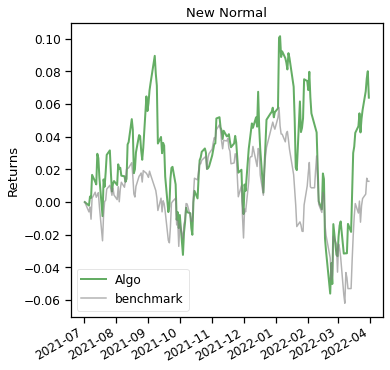

In [ ]:
print("==============Compare to DJIA===========")
%matplotlib inline
# S&P 500: ^GSPC
# Dow Jones Index: ^DJI
# NASDAQ 100: ^NDX
backtest_plot(df_account_value, 
             baseline_ticker = '^DJI', 
             baseline_start = df_account_value.loc[0,'date'],
             baseline_end = df_account_value.loc[len(df_account_value)-1,'date'])